<a href="https://colab.research.google.com/github/ShaheryarEhsan/ML_Labs/blob/main/Project_ML_Shaheryar_Ehsan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import datetime as dt
import torch
import random
import torch.nn as nn
import torch.optim as optim
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from torch.autograd import Variable
from sklearn import linear_model

In [ ]:
read_file = pd.read_csv('time.csv')


cleaned_file = read_file.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

filename = 'updated.csv'
cleaned_file.to_csv(filename)

cleaned_file

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02/01/2020,02/02/2020,02/03/2020,02/04/2020,02/05/2020,02/06/2020,02/07/2020,02/08/2020,02/09/2020,02/10/2020,02/11/2020,02/12/2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,05/01/2020,05/02/2020,05/03/2020,05/04/2020,05/05/2020,05/06/2020,05/07/2020,05/08/2020,05/09/2020,05/10/2020,05/11/2020,05/12/2020,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103,103,104,104,104,104,105,106,106,106,106,106,106,106,106,106,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025,3030,3035,3033,3035,3042,3044,3047,3051,3053,3053,3053,3059,3063,3071,3074,3075,3076,3078,3081,3082,3084,3086,3087,3090,3092,3089,3090
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28,28,28,28,28,28,28,28,27,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,1,3,2,3,2,2,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,1015,1019,1019,1024,1024,1026,1026,1026,1030,1033,1034,1033,1033,1034,1035,1038,1043,1043,1045,1045,1045,1045,1045,1051,1052,1051,1054,1055,1055,1057,1057,1058,1058,1058,1060,1061,1056,1057,1058,1058
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,435,435,435,437,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439,440,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8
250,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
255,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
257,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [ ]:
file_data = read_file
file_data = file_data.drop(columns=['Lat', 'Long'])

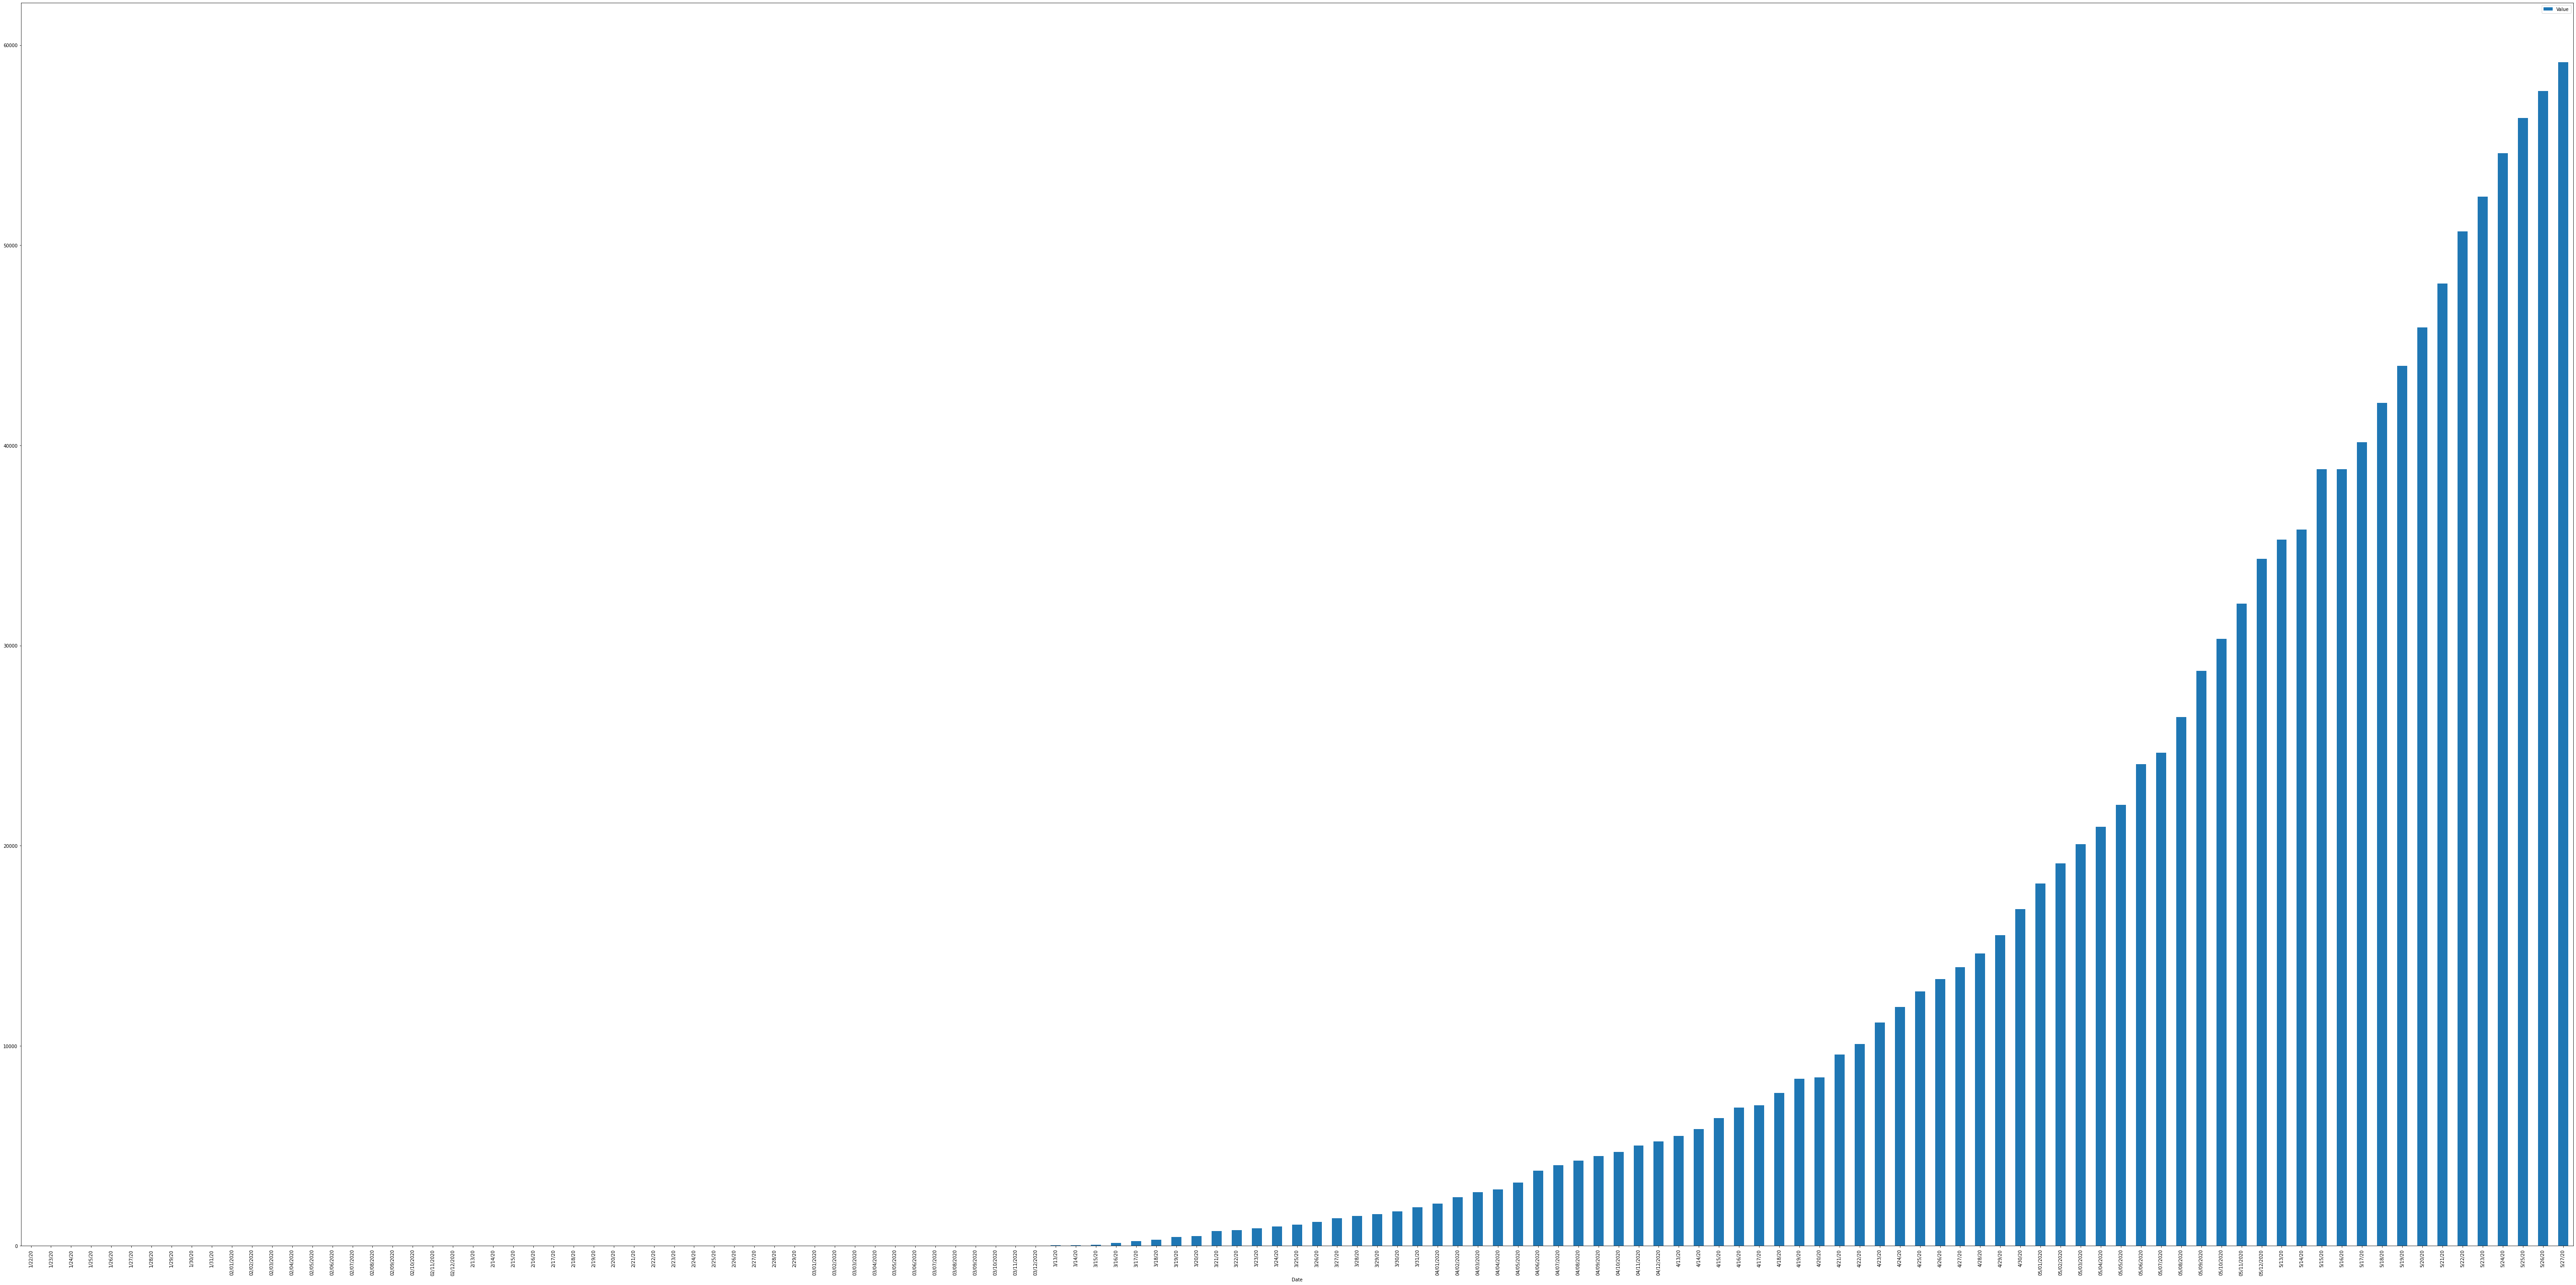

In [ ]:
cleared1 = pd.melt(file_data, id_vars=["Province/State", "Country/Region"], 
                  var_name="Date", value_name="Value")
Dates = cleared1.loc[cleared1['Country/Region'] == 'Pakistan', "Date"].unique()
cons_per_day = []
for i in Dates:
  cons = cleared1.loc[(cleared1['Date'] == i) & (cleared1['Country/Region'] == 'Pakistan'), 'Value'].sum()
  cons_per_day.append([i, cons])

dataframe_Pakistan= pd.DataFrame(data=cons_per_day, columns=["Date", "Value"])

dataframe_Pakistan.plot.bar(x="Date", figsize=(100,50))

In [ ]:
country_list = file_data['Country/Region'].unique()
correlation_table = []
for c in country_list:
  Dates = cleared1.loc[cleared1['Country/Region'] == c, "Date"].unique()
  cons_per_day = []
  for i in Dates:
    cons = cleared1.loc[(cleared1['Date'] == i) & (cleared1['Country/Region'] == c), 'Value'].sum()
    cons_per_day.append([i, cons])

  dataframe = pd.DataFrame(data=cons_per_day, columns=["Date", "Value"])
  series = dataframe.corrwith(dataframe_Pakistan, method='pearson')
  correlation_table.append([c, series[0]])


In [ ]:
n = len(correlation_table) 
  
for i in range(n-1): 

  for j in range(0, n-i-1): 
    if correlation_table[j][1] > correlation_table[j+1][1] : 
      correlation_table[j], correlation_table[j+1] = correlation_table[j+1], correlation_table[j] 

print("Most Correlated Country", correlation_table[n-2][0], "with a score of", correlation_table[n-2][1])
print("Second Correlated Country", correlation_table[n-3][0], "with a score of", correlation_table[n-3][1])
print("Third Correlated Country", correlation_table[n-4][0], "with a score of", correlation_table[n-4][1])
print("Fourth Correlated Country", correlation_table[n-5][0], "with a score of", correlation_table[n-5][1])
print("Fifth Correlated Country", correlation_table[n-6][0], "with a score of", correlation_table[n-6][1])

Most Correlated Country Saudi Arabia with a score of 0.9989666872972038
Second Correlated Country Qatar with a score of 0.9987397834693381
Third Correlated Country Colombia with a score of 0.9987031556505498
Fourth Correlated Country Peru with a score of 0.9986075757030278
Fifth Correlated Country Egypt with a score of 0.998586131463671


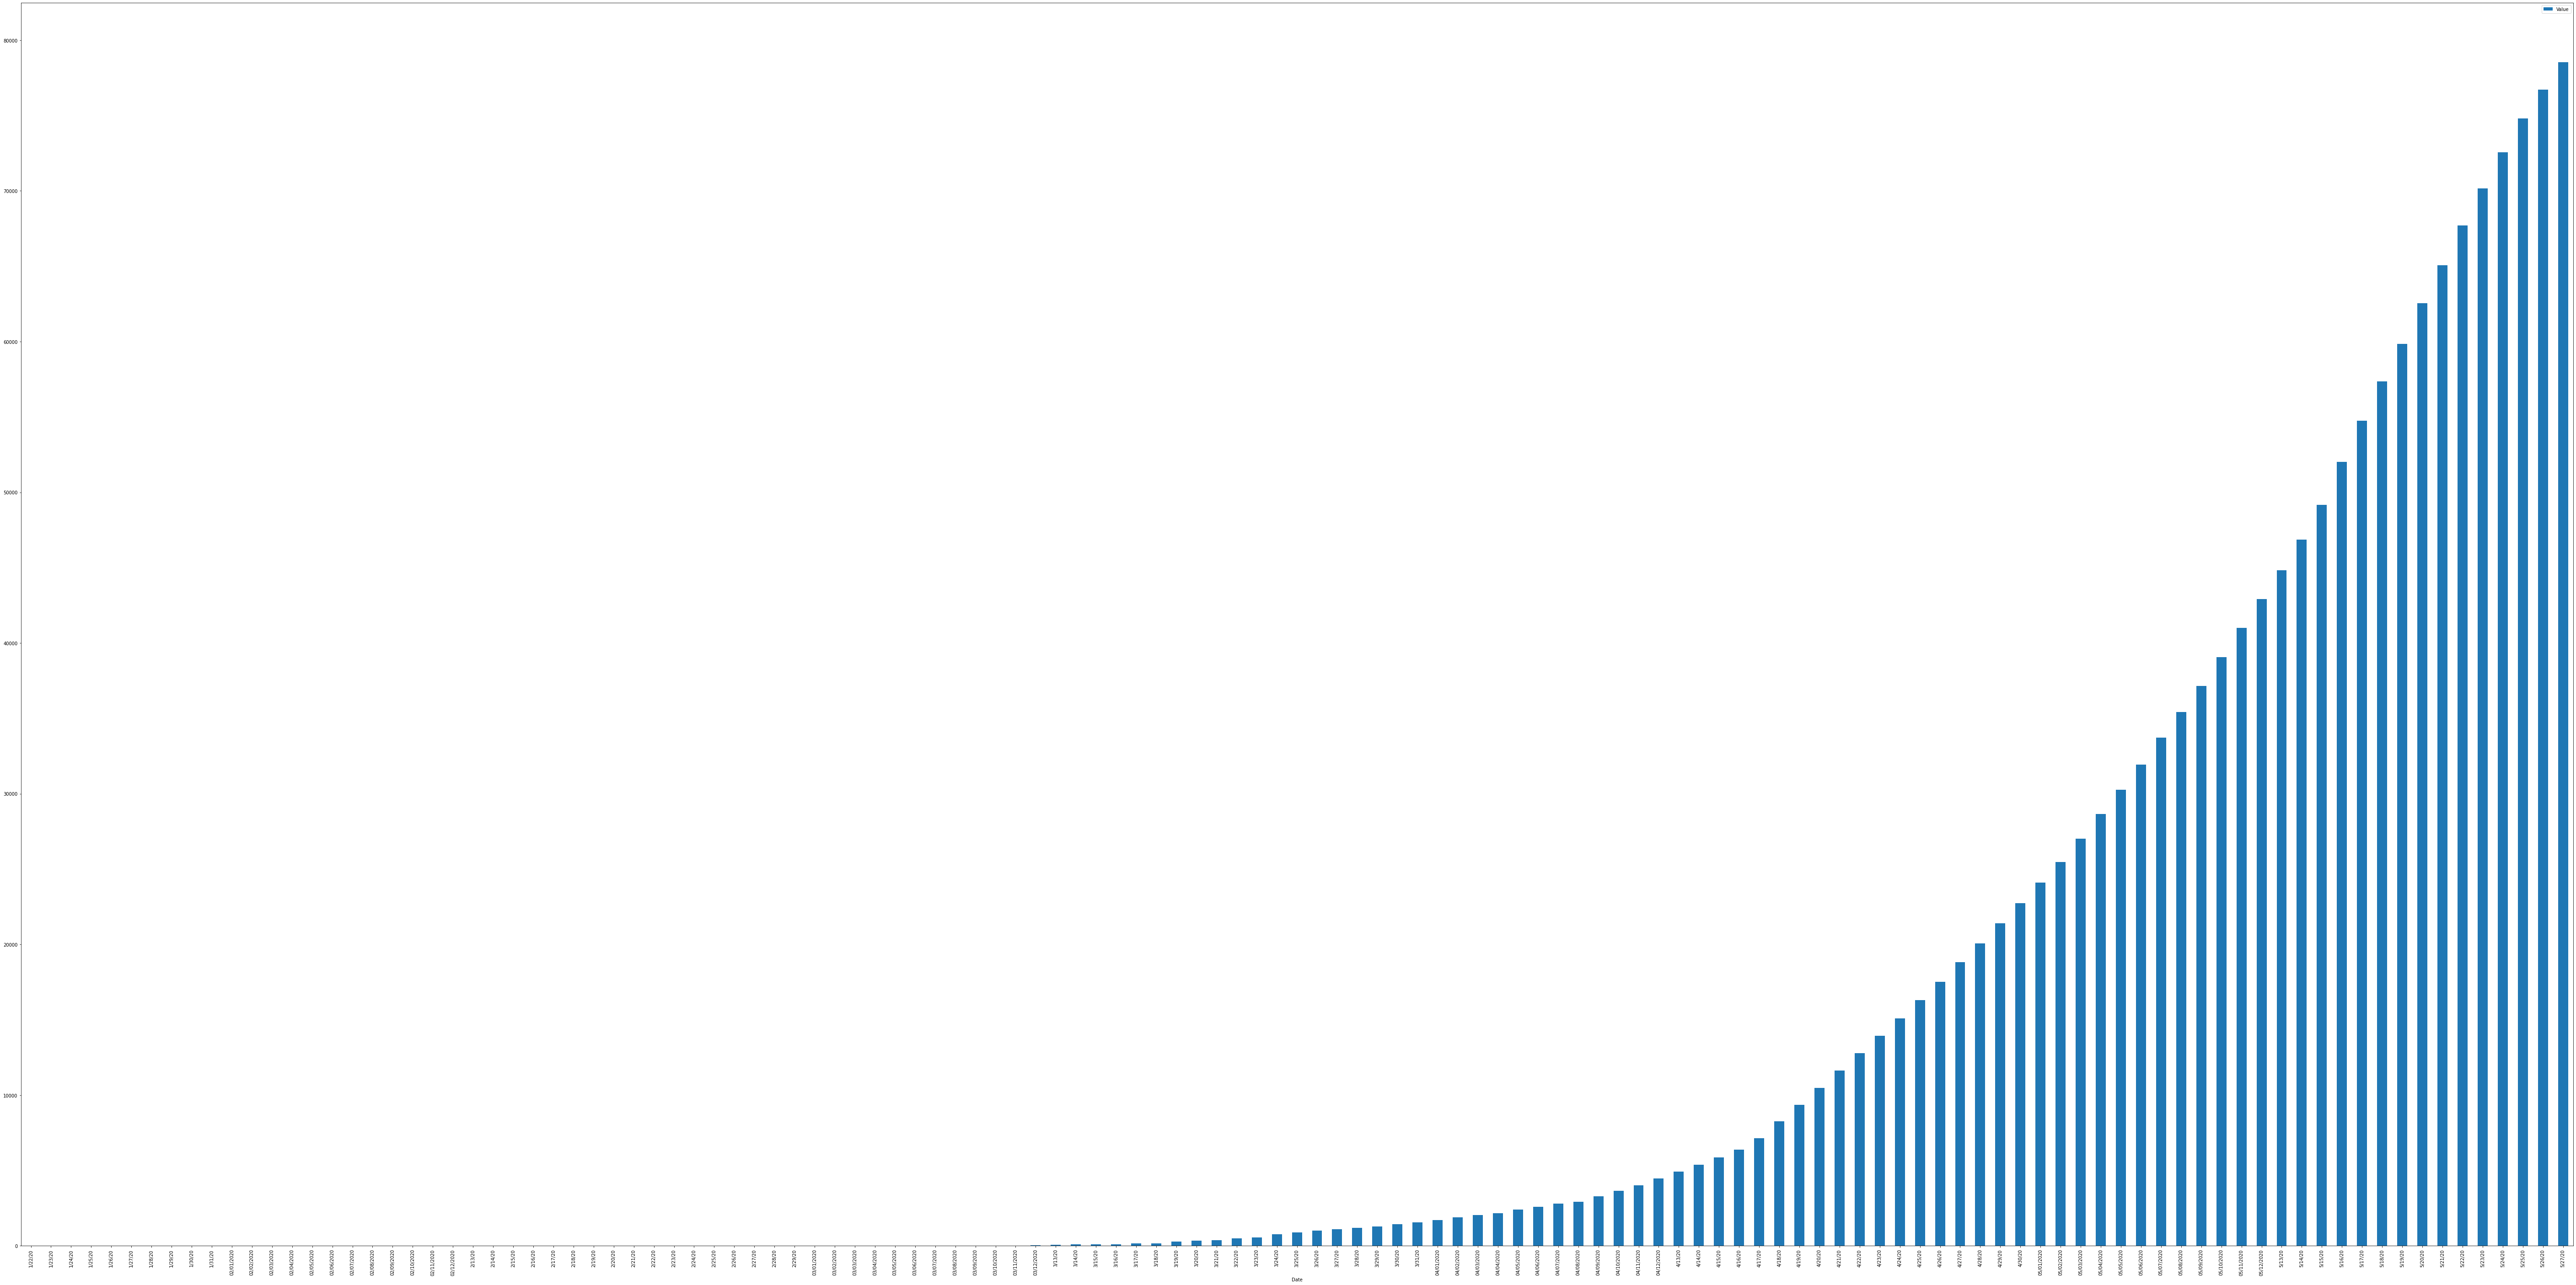

In [ ]:
Dates = cleared1.loc[cleared1['Country/Region'] == 'Saudi Arabia', "Date"].unique()
cons_per_day = []
for i in Dates:
  cons = cleared1.loc[(cleared1['Date'] == i) & (cleared1['Country/Region'] == 'Saudi Arabia'), 'Value'].sum()
  cons_per_day.append([i, cons])

dataframe_Arabia= pd.DataFrame(data=cons_per_day, columns=["Date", "Value"])

dataframe_Arabia.plot.bar(x="Date", figsize=(100,50))

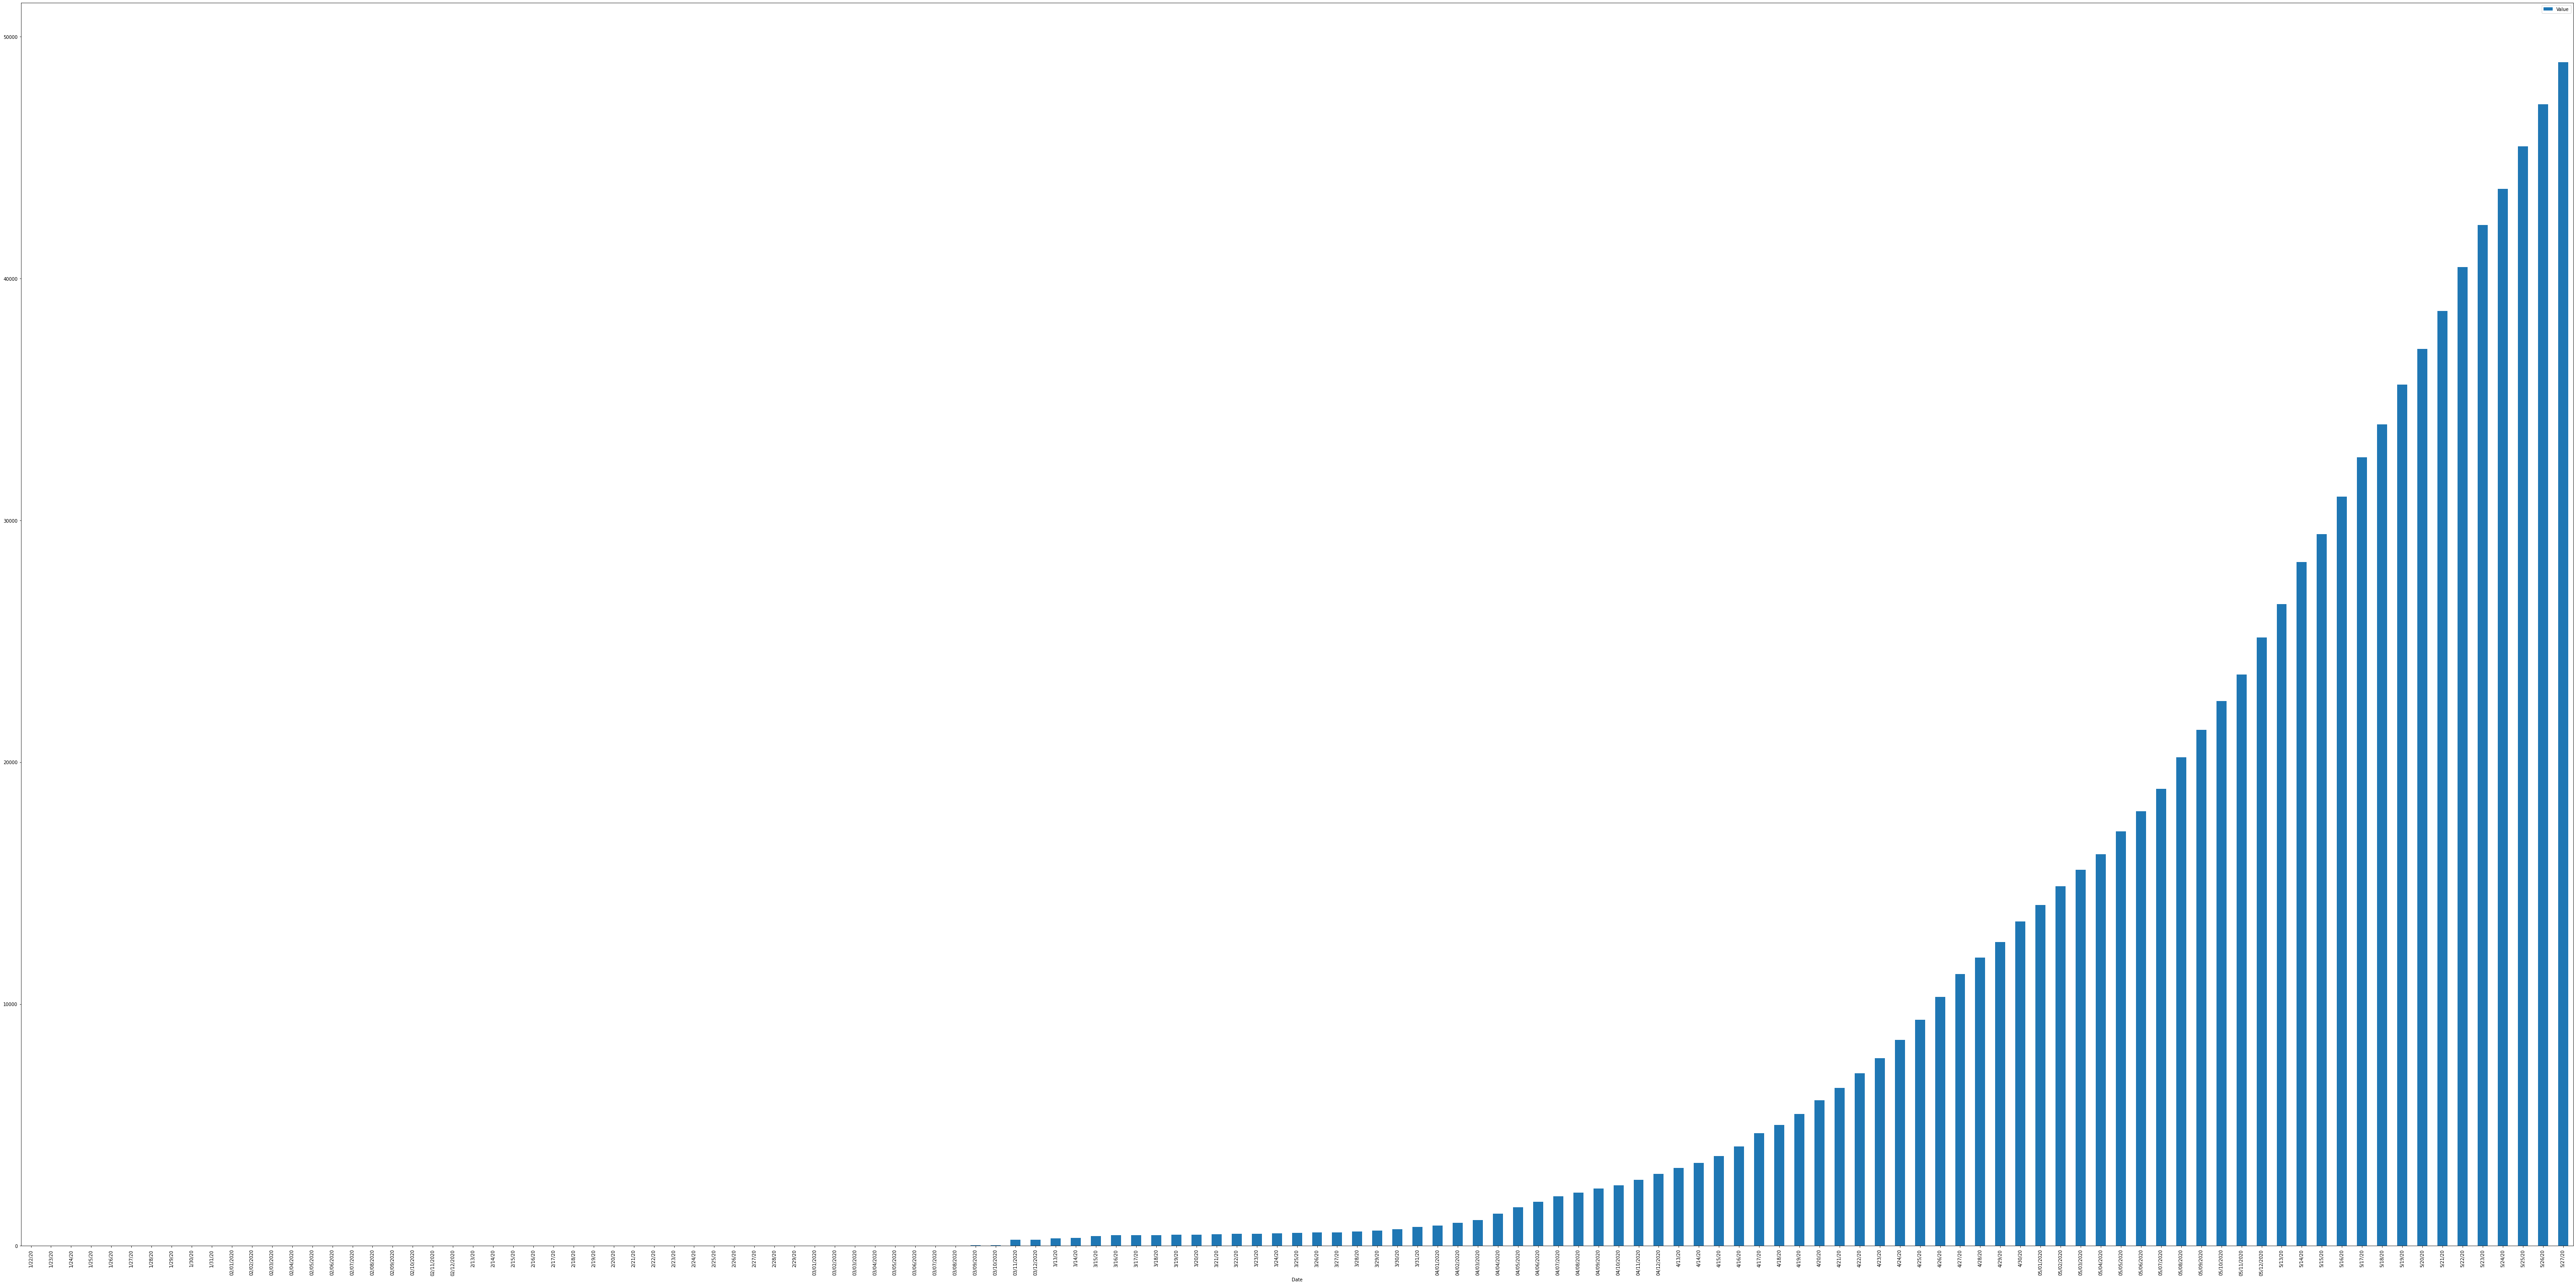

In [ ]:
Dates = cleared1.loc[cleared1['Country/Region'] == 'Qatar', "Date"].unique()
cons_per_day = []
for i in Dates:
  cons = cleared1.loc[(cleared1['Date'] == i) & (cleared1['Country/Region'] == 'Qatar'), 'Value'].sum()
  cons_per_day.append([i, cons])

dataframe_Qatar= pd.DataFrame(data=cons_per_day, columns=["Date", "Value"])

dataframe_Qatar.plot.bar(x="Date", figsize=(100,50))

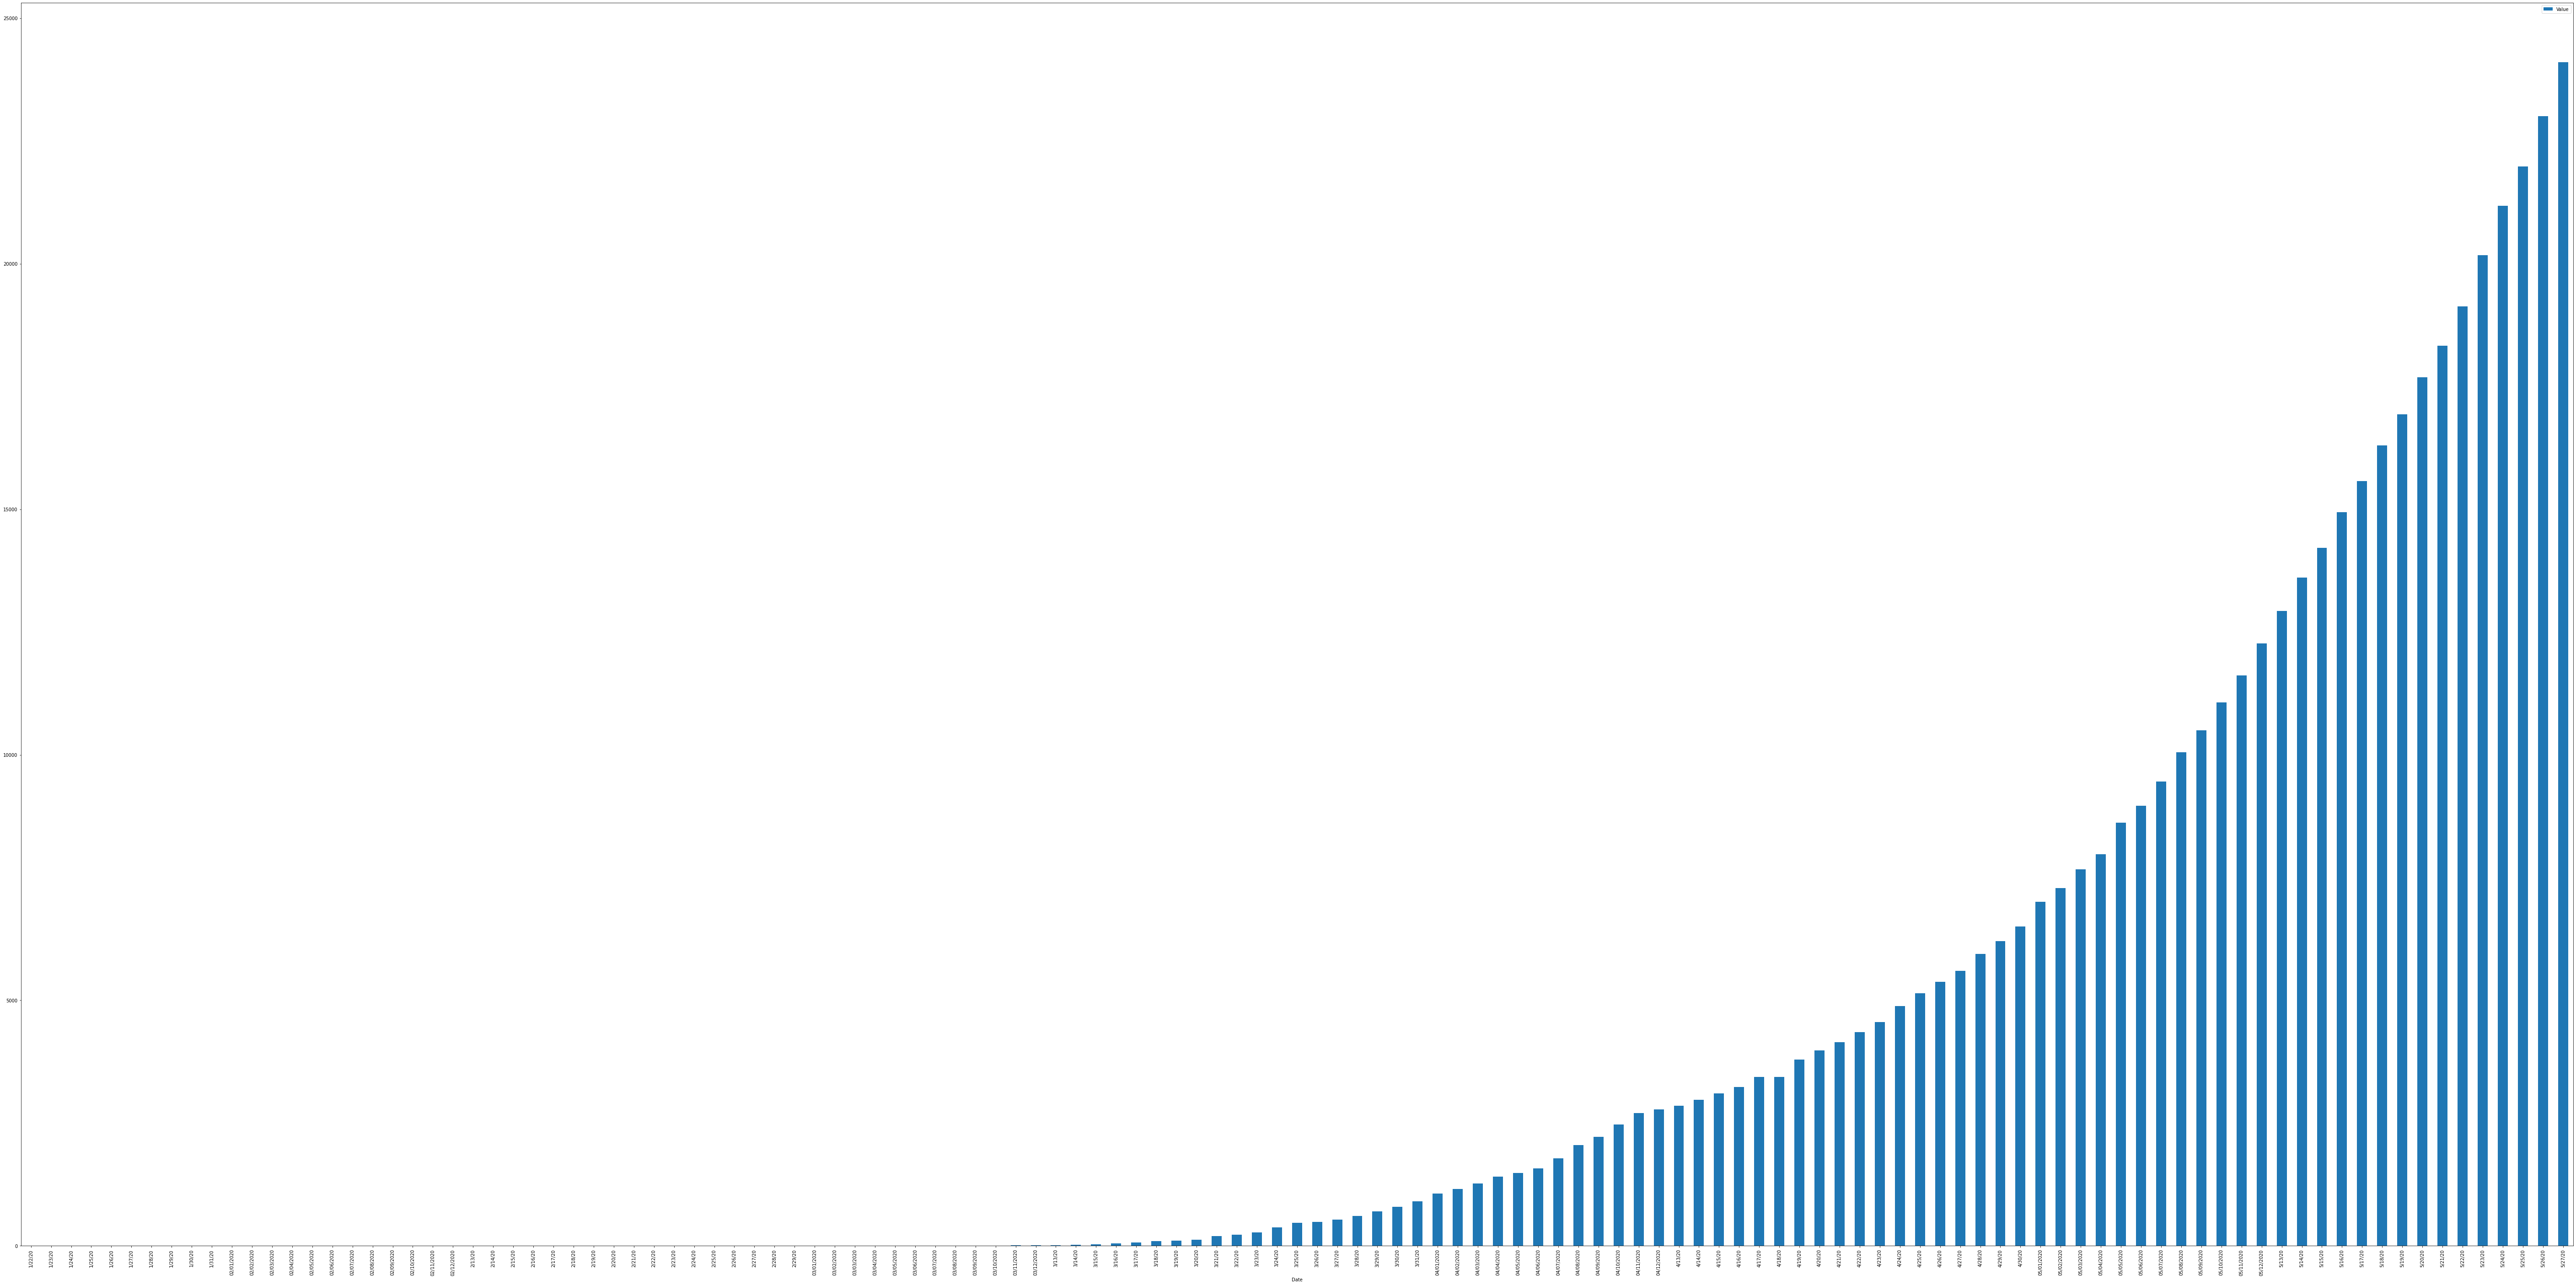

In [ ]:
Dates = cleared1.loc[cleared1['Country/Region'] == 'Colombia', "Date"].unique()
cons_per_day = []
for i in Dates:
  cons = cleared1.loc[(cleared1['Date'] == i) & (cleared1['Country/Region'] == 'Colombia'), 'Value'].sum()
  cons_per_day.append([i, cons])

dataframe_Colombia= pd.DataFrame(data=cons_per_day, columns=["Date", "Value"])

dataframe_Colombia.plot.bar(x="Date", figsize=(100,50))

Predicting using Saudi Arabia

In [ ]:
date = pd.to_datetime(dataframe_Arabia['Date'])
date

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
122   2020-05-23
123   2020-05-24
124   2020-05-25
125   2020-05-26
126   2020-05-27
Name: Date, Length: 127, dtype: datetime64[ns]

In [ ]:
cases = dataframe_Arabia['Value']
cases

0          0
1          0
2          0
3          0
4          0
       ...  
122    70161
123    72560
124    74795
125    76726
126    78541
Name: Value, Length: 127, dtype: int64

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(cases[:,None])

seq_length = 5
x, y = sliding_windows(training_data, seq_length)

train_size = 110
test_size = 17

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.07118
Epoch: 100, loss: 0.00812
Epoch: 200, loss: 0.00006
Epoch: 300, loss: 0.00005
Epoch: 400, loss: 0.00004
Epoch: 500, loss: 0.00003
Epoch: 600, loss: 0.00003
Epoch: 700, loss: 0.00003
Epoch: 800, loss: 0.00002
Epoch: 900, loss: 0.00002
Epoch: 1000, loss: 0.00002
Epoch: 1100, loss: 0.00002
Epoch: 1200, loss: 0.00002
Epoch: 1300, loss: 0.00001
Epoch: 1400, loss: 0.00001
Epoch: 1500, loss: 0.00001
Epoch: 1600, loss: 0.00001
Epoch: 1700, loss: 0.00001
Epoch: 1800, loss: 0.00001
Epoch: 1900, loss: 0.00001


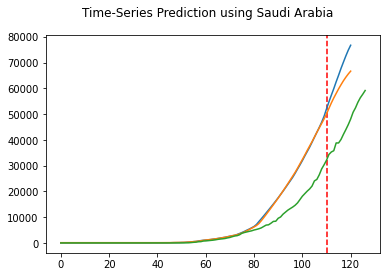

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.plot(dataframe_Pakistan['Value'])
plt.suptitle('Time-Series Prediction using Saudi Arabia')
plt.show()

Monthly Prediction

In [ ]:
training_data_month = sc.fit_transform(cases[:,None])
month_data = training_data_month[-15:]
for i in range(20):
  x, y = sliding_windows(month_data[-15:], seq_length)

  train_size = 14
  test_size = 1

  dataX = Variable(torch.Tensor(np.array(x)))
  dataY = Variable(torch.Tensor(np.array(y)))

  trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
  trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

  testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
  testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

  num_epochs = 1000
  learning_rate = 0.01

  input_size = 1
  hidden_size = 2
  num_layers = 1

  num_classes = 1

  lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

  criterion = torch.nn.MSELoss()    # mean-squared error for regression
  optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
  #optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

  # Train the model
  for epoch in range(num_epochs):
      outputs = lstm(trainX)
      optimizer.zero_grad()
      
      # obtain the loss function
      loss = criterion(outputs, trainY)
      
      loss.backward()
      
      optimizer.step()
      if epoch % 100 == 0:
        #hey
        continue

  lstm.eval()
  train_predict = lstm(dataX)
  data_predict = train_predict.data.numpy()
  dataY_plot = dataY.data.numpy()

  data_predict = sc.inverse_transform(data_predict)
  dataY_plot = sc.inverse_transform(dataY_plot)
  month_data = np.concatenate((month_data[-15:], data_predict))



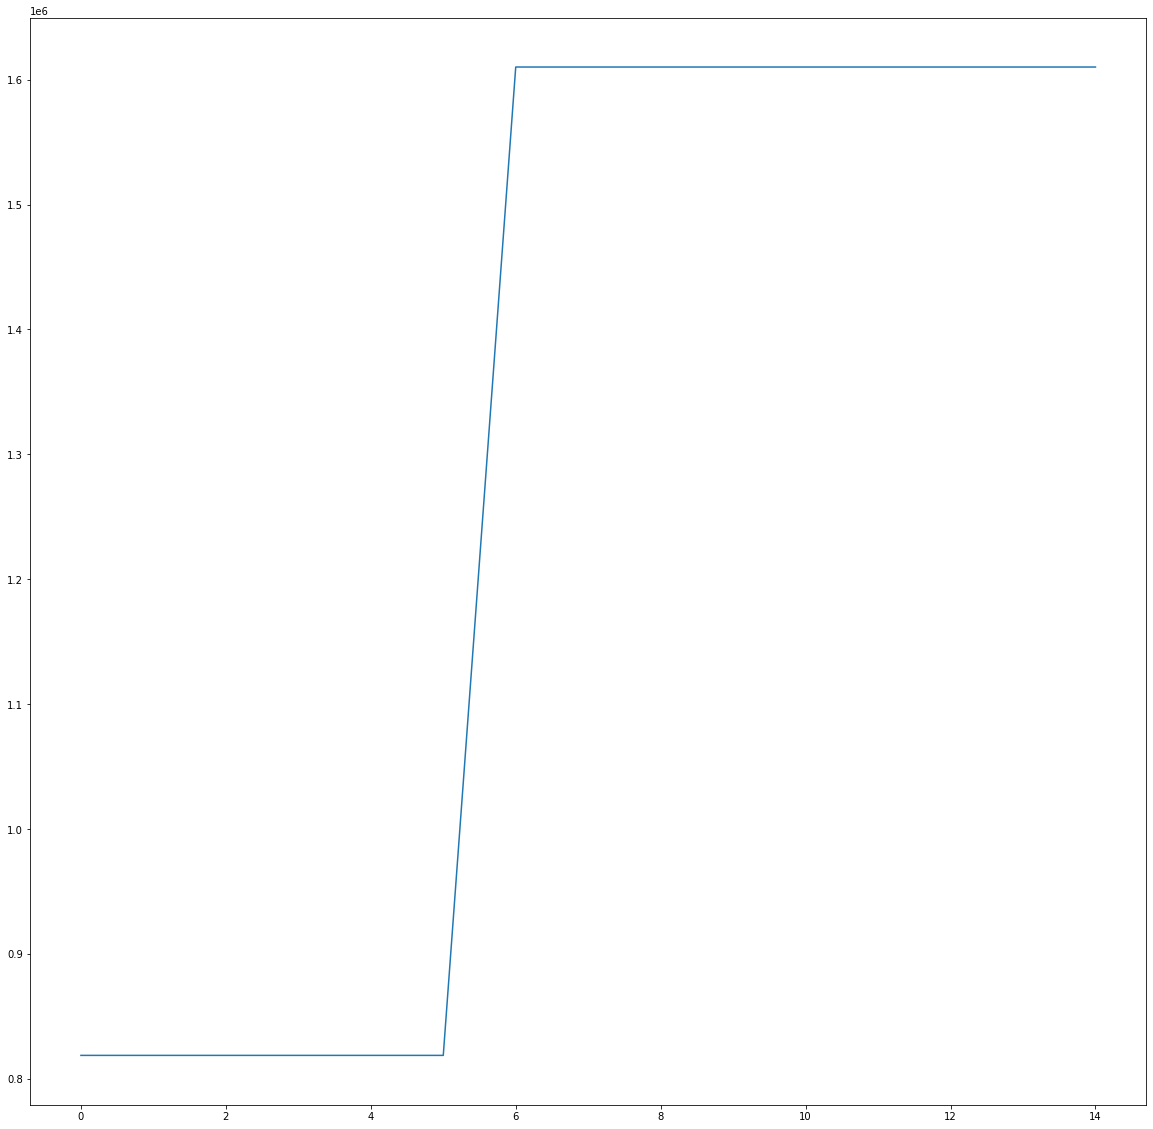

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(month_data[0:15])
plt.show()

Qatar Dataset evaluation

In [ ]:
cases_Qatar = dataframe_Qatar['Value']
training_data = sc.fit_transform(cases_Qatar[:,None])

seq_length = 10
x, y = sliding_windows(training_data, seq_length)

train_size = 110
test_size = 17

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.05939
Epoch: 100, loss: 0.00106
Epoch: 200, loss: 0.00028
Epoch: 300, loss: 0.00016
Epoch: 400, loss: 0.00011
Epoch: 500, loss: 0.00008
Epoch: 600, loss: 0.00006
Epoch: 700, loss: 0.00005
Epoch: 800, loss: 0.00004
Epoch: 900, loss: 0.00003
Epoch: 1000, loss: 0.00003
Epoch: 1100, loss: 0.00002
Epoch: 1200, loss: 0.00002
Epoch: 1300, loss: 0.00001
Epoch: 1400, loss: 0.00001
Epoch: 1500, loss: 0.00001
Epoch: 1600, loss: 0.00001
Epoch: 1700, loss: 0.00001
Epoch: 1800, loss: 0.00001
Epoch: 1900, loss: 0.00001


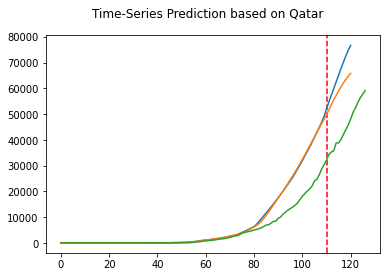

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.plot(dataframe_Pakistan['Value'])
plt.suptitle('Time-Series Prediction based on Qatar')
plt.show()

Prediction based on Colombia

In [ ]:
cases_Colombia = dataframe_Colombia['Value']
training_data = sc.fit_transform(cases_Colombia[:,None])

seq_length = 10
x, y = sliding_windows(training_data, seq_length)

train_size = 110
test_size = 17

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.59249
Epoch: 100, loss: 0.00714
Epoch: 200, loss: 0.00010
Epoch: 300, loss: 0.00009
Epoch: 400, loss: 0.00008
Epoch: 500, loss: 0.00008
Epoch: 600, loss: 0.00007
Epoch: 700, loss: 0.00006
Epoch: 800, loss: 0.00006
Epoch: 900, loss: 0.00005
Epoch: 1000, loss: 0.00004
Epoch: 1100, loss: 0.00004
Epoch: 1200, loss: 0.00004
Epoch: 1300, loss: 0.00003
Epoch: 1400, loss: 0.00003
Epoch: 1500, loss: 0.00003
Epoch: 1600, loss: 0.00002
Epoch: 1700, loss: 0.00002
Epoch: 1800, loss: 0.00002
Epoch: 1900, loss: 0.00002


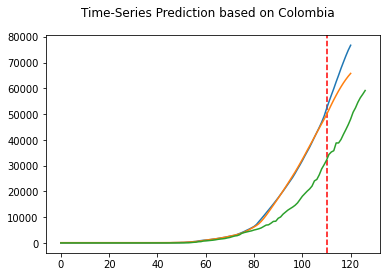

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.plot(dataframe_Pakistan['Value'])
plt.suptitle('Time-Series Prediction based on Colombia')
plt.show()